<a href="https://colab.research.google.com/github/Sulaiman29/BDA_HW2/blob/main/Copy_of_BDA2025Spring_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info"><b></b>

# <h1><center> <font color='black'>Homework 02</font></center></h1>

<h2><center> <font color='black'> Regression & Regularization</font></center></h2>    
<h2><center> <font color='black'> MTAT.03.319 - Business Data Analytics</font></center></h2>
<h2><center> <font color='black'> University of Tartu - Spring 2025</font></center></h2>
</div>

# Homework instructions

- Please provide the names and student IDs of the team-members (Maximum 2 person) in the field "Team mates" below. If you are not working in a team please insert only your name and student ID.

- Please provide code where ever applicable.

- The accepted submission format is .ipynb file. Please make sure that the privacy settings for the file is public so we can access your code.

- The submission will automatically close on <font color='red'>**30 March at 23:59**</font>, so please make sure to submit before the deadline.

- ONLY one of the teammates should submit the homework and in the submission description the other person's Name and Student ID must be entered. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submit the homework.

- If a question is not clear, please ask us in Moodle ONLY.

- After you have finished solving the Homework, please restart the Kernel and run all the cells to check if there is any persisting issues.

- Plagiarism is <font color='red'>**PROHIBITED**</font>. Any form of plagiarism will be dealt according to the university policy (https://ut.ee/en/content/academic-fraud).

- <font color='red'>**DO NOT CHANGE THE TEMPLATE**</font>

- <font color='red'>**Restart the Kernel and Run all the cells once again after you are done.**</font>
This will ensure that all the cells run without error. You will find an option in the top menu bar under Kernel tab.

**<h2><font color='red'>Team mates:</font></h2>**


<font color='red'>Name: </font>&emsp; Muhammad Sulaiman Javed  <font color='red'>Student ID: </font>


<font color='red'>Name: MD Murad Alahi Misu</font>&emsp;   <font color='red'>Student ID: </font>




# Introduction

* In this homework you are going to apply supervised learning: Linear Regression method using Scikit-learn package; Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy [https://en.wikipedia.org/wiki/Scikit-learn].

### The homework is divided into four sections and the points are distributed as below:
<pre>
- Linear Regression    -> 3 points
- PCA                  -> 3 points
- Overfitting          -> 5 points
_________________________________________
Total                  -> 11 points
</pre>

# 1. Regression
## 1.1 Linear Regression (2 points)

We are going to use the Prices dataset that contains 74 columns. Each column represents a feature of houses for sale. The ```SalePrice``` column  shows their prices.

In [ ]:
import pandas as pd
data = pd.read_csv("Prices.csv")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


The column names are self-explanatory which indicates features of each house.

**1.1.1. The target label is```SalePrice``` which means, later we will predict the sale-price based on the given features (columns). But for regression task, it is important to ensure that the data is not skewed. In order to do that, please plot the distribution of ```SalePrice``` column and explain what do you see. (0.35 point)**

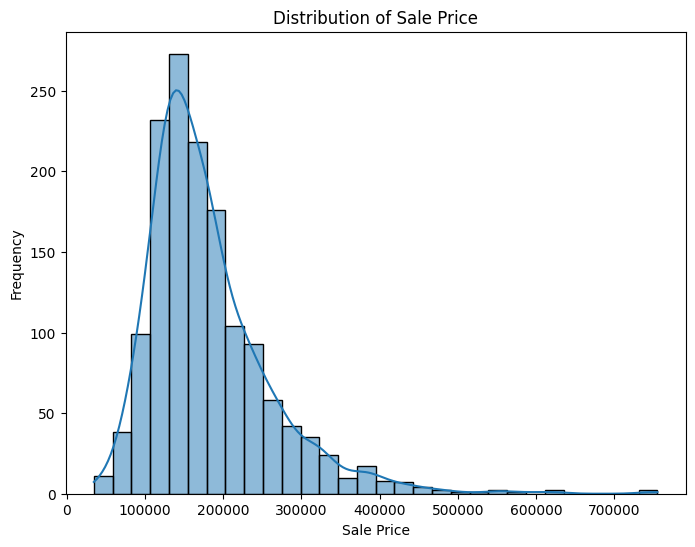

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of SalePrice
plt.figure(figsize=(8,6))
sns.histplot(data['SalePrice'], kde=True, bins=30)
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Distribution of Sale Price")
plt.show()

**<font color='red'>Answer:</font>** Data is positively skewed as the tail is towards the right. It means there are more houses with lower prices and fewer houses with extremely high prices.

So, the data seems to be skewed which has to be fixed otherwise it may lead to erronous result.
Apart from that, look closely, some columns are not numerical. For those, you have to convert them to numerical value or represent them in a way so that the algorithm can understand the data. One of such way is called, one hot encoding. Along with that, the algorithm cannot deal with NaN or Infinite values. So please address all of these in the preprocessing section.

- Preprocess for skewed data
- Apply one-hot encoding to categorical data types
- Replace negative infinite values with 0

**1.1.2. After preprocessing the skewed data, plot ```SalePrice``` column distribution again. (0.15 point)**

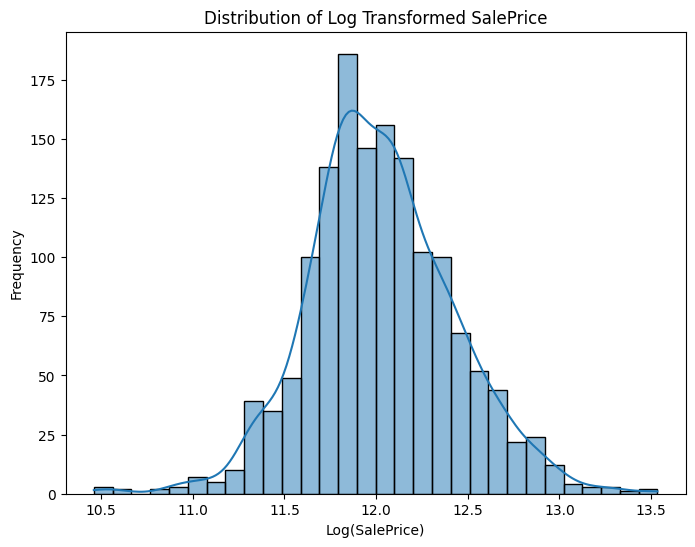

In [ ]:
import numpy as np
# Fix Skewness in SalePrice using Log Transformation
data['SalePrice'] = np.log1p(data['SalePrice'])

# Identify Categorical Columns & Apply One-Hot Encoding
categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Handle NaN Values
data.fillna(data.mean(numeric_only=True), inplace=True)  # Fill numerical NaNs with mean
data.fillna(data.mode().iloc[0], inplace=True)  # Fill categorical NaNs with mode

# Replace -Inf values with 0
data.replace(-np.inf, 0, inplace=True)

# Plot SalePrice after transformation
plt.figure(figsize=(8,6))
sns.histplot(data['SalePrice'], kde=True, bins=30)
plt.xlabel("Log(SalePrice)")
plt.ylabel("Frequency")
plt.title("Distribution of Log Transformed SalePrice")
plt.show()


<font color='red'> **Answer:**</font> (AI cited), done data preprocessing and removed skewness in data and other things mentioned.

**1.1.3. Calculate the correlation between price and each feature. Which are the top 3 features that have the highest correlation with  price? Is the correlation positive or negative? Explain what happens with the price when each of those 3 features change (consider only one feature at a time) and others are kept constant. (0.5 point)**



In [ ]:
# Compute correlation with SalePrice
correlations = data.corr()['SalePrice'].drop('SalePrice')  # Drop self-correlation

# Sort correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)

# Print all correlation values
print("Correlation of all features with SalePrice:")
print(sorted_correlations)


Correlation of all features with SalePrice:
OverallQual          0.817185
GrLivArea            0.700927
GarageCars           0.680625
GarageArea           0.650888
TotalBsmtSF          0.612134
                       ...   
GarageType_Detchd   -0.388638
GarageFinish_Unf    -0.432012
BsmtQual_TA         -0.477611
KitchenQual_TA      -0.538237
ExterQual_TA        -0.595882
Name: SalePrice, Length: 231, dtype: float64


<font color='red'> **Answer:**</font> Top 3 features having highest correlation are:


*   OverallQual
*   GrLivArea
*   GarageCars

All are positively correlated. so if each of these 3 features increase, then so does the price. and if it decreases then so does the price as it is positively correlated.




**1.1.4.  Now you have to build a regression model that would be trained on training data and later predict the price on test data. You are free to select features on which you want train the model. The dataset has missing values, so please apply the following methods for dealing with the missing data in the features of your choice:**

a) mean imputation

b) median imputation

c) mode imputation

d) dropping missing values

**Split dataset into the training (80% of the all rows) and test ( 20% of all rows) set, you can use train_test_split function from scikit-learn. While splitting, set the parameter random_state equal to 2, this will reproduce similar split during grading.**

**For each of the case report MAE, RMSE and R<sup>2</sup>. Which method works better ?(2.0 points)**



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# For reproducibility, assume 'data' is already loaded and preprocessed (e.g., one-hot encoding, etc.)
# Here we select three features based on prior correlation analysis.
features = ['OverallQual', 'GrLivArea', 'GarageCars']
X = data[features]
y = data['SalePrice']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

methods = ['mean imputation', 'median imputation', 'mode imputation', 'dropping missing values']
# Store the results in these lists
MAE = []
RMSE = []
R2 = []

for method in methods:
    # Work on a copy of training and test sets to avoid altering original splits
    X_train_method = X_train.copy()
    X_test_method = X_test.copy()
    y_train_method = y_train.copy()
    y_test_method = y_test.copy()

    if method == 'mean imputation':
        imputer = SimpleImputer(strategy='mean')
        X_train_imp = imputer.fit_transform(X_train_method)
        X_test_imp = imputer.transform(X_test_method)
    elif method == 'median imputation':
        imputer = SimpleImputer(strategy='median')
        X_train_imp = imputer.fit_transform(X_train_method)
        X_test_imp = imputer.transform(X_test_method)
    elif method == 'mode imputation':
        imputer = SimpleImputer(strategy='most_frequent')
        X_train_imp = imputer.fit_transform(X_train_method)
        X_test_imp = imputer.transform(X_test_method)
    elif method == 'dropping missing values':
        # Drop rows with any missing values in the feature set
        X_train_imp = X_train_method.dropna()
        # Align y_train with the dropped rows
        y_train_method = y_train_method.loc[X_train_imp.index]
        X_test_imp = X_test_method.dropna()
        y_test_method = y_test_method.loc[X_test_imp.index]
    else:
        continue

    # Train the regression model
    model = LinearRegression()
    model.fit(X_train_imp, y_train_method)
    y_pred = model.predict(X_test_imp)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test_method, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_method, y_pred))
    r2 = r2_score(y_test_method, y_pred)

    MAE.append(mae)
    RMSE.append(rmse)
    R2.append(r2)

# Print the metrics for each method
for i, m in enumerate(methods):
    print("Method: " + m + "  MAE: " + str(MAE[i]) + "  RMSE: " + str(RMSE[i]) + "  R2: " + str(R2[i]))


Method: mean imputation  MAE: 0.13299354063293561  RMSE: 0.17337148666715807  R2: 0.8213830524174242
Method: median imputation  MAE: 0.13299354063293561  RMSE: 0.17337148666715807  R2: 0.8213830524174242
Method: mode imputation  MAE: 0.13299354063293561  RMSE: 0.17337148666715807  R2: 0.8213830524174242
Method: dropping missing values  MAE: 0.13299354063293561  RMSE: 0.17337148666715807  R2: 0.8213830524174242


<font color='red'> **Answer:**</font> Method: mean imputation  MAE: 0.13299354063293561  RMSE: 0.17337148666715807  R2: 0.8213830524174242
Method: median imputation  MAE: 0.13299354063293561  RMSE: 0.17337148666715807  R2: 0.8213830524174242
Method: mode imputation  MAE: 0.13299354063293561  RMSE: 0.17337148666715807  R2: 0.8213830524174242
Method: dropping missing values  MAE: 0.13299354063293561  RMSE: 0.17337148666715807  R2: 0.8213830524174242

**Please store the best MAE, RMSE, r2_best score in the following variables. We will use these variable to compare ```1.2.7```**

In [ ]:
mae_best = MAE[0]    #best MAE
rmse_best = RMSE[0]  #best RMSE
r2_best = R2[0]      #best R2

# 1.2 Principal Component Analysis (PCA) (3 points)
Our model performs quite good. But there is always room to make it better and simpler. By simpler, we mean the reducing the dimensionality of the dataset so that we can have a simpler linear regression model. <br> <br>If you noticed after one-hot encoding, we have 270 features (columns) but all these features do not hold the same level of information. For example, the first feature may hold 50% of the information required to make the linear regression acheive the performance we already had; the last, (feature number 270) may contribute to only 0.0000001% to the total output. Hence, adding this last variable (actually there could be more) to our linear regression model (read equation) will only increase the complexity of the model; space, time and computational complexity. Therefore, it is wise and desirable to make the model simpler yet performing the best (better).
<br> <br>
One such way to reduce the dimensionality of the dataset is known as Pricipal Component Analysis. Using this method, we can find out which features contribute the most in our model, therefore, we can wisely select how many we need. We will perform, PCA in this section of the homework. <br><br>

*There is another powerful method for dimensionality reduction, named t-SNE. We will use t-sne in future homework. <br><br>*



**1.2.1. From ```1.1.4``` keep the best method to deal with missing values and apply PCA to reduce the number of features. (1 point)**

In [ ]:
from sklearn.decomposition import PCA

# Define feature matrix and target variable
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# First, use a temporary PCA to determine the number of components to preserve 95% variance.
pca_temp = PCA(n_components=0.95, whiten=True, random_state=0)
pca_temp.fit(X)
n_components_int = pca_temp.n_components_
print("Number of components to preserve 95% variance:", n_components_int)

# Now initialize PCA with the integer number of components and your desired parameters
pca = PCA(n_components=n_components_int, whiten=True, svd_solver='randomized', random_state=0)
X_pca = pca.fit_transform(X)


Number of components to preserve 95% variance: 1


<font color='red'> **Answer:**</font>

**1.2.2. What percentage of the variance is explained by the first five components? (0.25 point)**

In [ ]:
# Sum the explained variance ratios for the first five components
variance_first_five = np.sum(pca.explained_variance_ratio_[:5])
print("Percentage of variance explained by the first five components: {:.2f}%".format(variance_first_five * 100))

Percentage of variance explained by the first five components: 98.48%


<font color='red'> **Answer:**</font> Percentage of variance explained by the first five components: 98.48%

It would be helpful if we could see all of the variance against the number of components, so a plot would give us a better understanding of the situation.

**1.2.3. Please plot the result of PCA you built in ```1.2.1```<br>
X-axis=Number of Components, Y-axis=Total explained variance and explain the result.(0.5 point)**

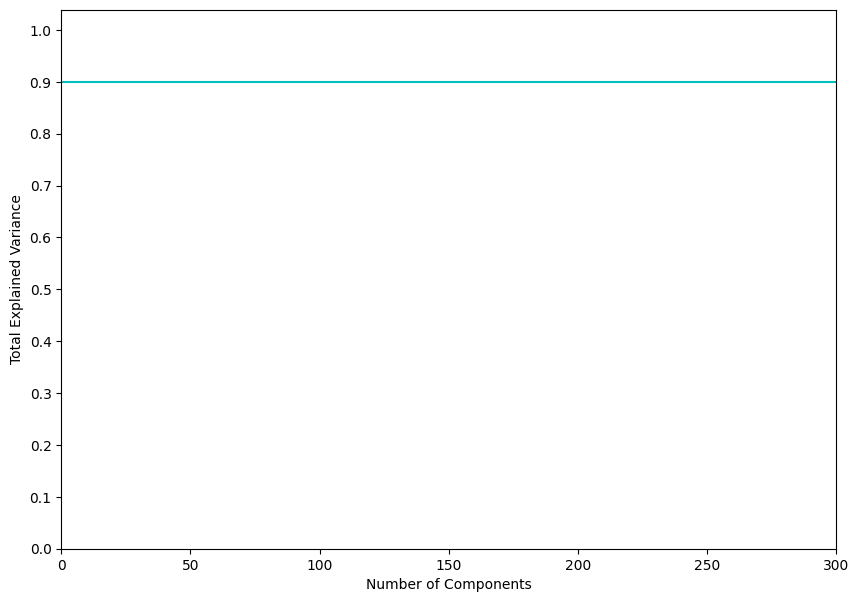

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate cumulative explained variance from the PCA object
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,7))
lw = 2
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, color='red', lw=lw)
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance')

plt.xlim(0, 300)
plt.yticks(np.arange(0, 1.1, 0.1))

# A horizontal line at 90% explained variance to help determine how many components are needed.
plt.axhline(0.9, c='c')
plt.show()


<font color='red'> **Answer:**</font>

**1.2.4. Again, from ```1.1.4``` keep the best method to deal with missing values and use PCA to reduce the number of features. But you can use only the number of features that are significant in ```1.1.3```, in this case you have to choose an optimum n_component value based on the PCA plot. Otherwise, you can select all of the features and pass the n_components=37. In all cases, keep random_state for PCA equal to 0. (0.25 points)**

In [ ]:
from sklearn.decomposition import PCA

# Define feature matrix and target variable using the preprocessed data (mean imputation)
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Option 2: Otherwise, using all features and setting n_components=37:
pca = PCA(n_components=37, random_state=0)

# Fit PCA on X and transform the features
X_pca = pca.fit_transform(X)


<font color='red'> **Answer:**</font>

**1.2.5. Use the new components derived from PCA to predict the house pricing. Keep the ratio of test and train set to 20/80 and the random_state equal to 0. Report MAE, RMSE and R<sup>2</sup> (0.75 point)** <br>
*Hint: Now your training data is different. Please use pca.transform(X) function to create your new training dataset. But make sure you have the fitted pca from ```1.2.4```*

In [ ]:
pca_X = pca.transform(X)


methods = ['mean imputation', 'median imputation', 'mode imputation', 'dropping missing values']
MAE = []
RMSE = []
R2 = []

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train_pca, y_train_pca)

y_predicted_pca = regressor.predict(X_test_pca)

mae_pca = mean_absolute_error(y_test_pca, y_predicted_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test_pca, y_predicted_pca))
r2_pca = r2_score(y_test_pca, y_predicted_pca)


print("MAE: " + str(mae_pca) + "  RMSE: " + str(rmse_pca) + "  R2: " + str(r2_pca))


MAE: 0.09782226479970176  RMSE: 0.2107314885559814  R2: 0.7066821184179726


<font color='red'> **Answer:**</font>
MAE: 0.09782226479970176  RMSE: 0.2107314885559814  R2: 0.7066821184179726



**1.2.6 The following cell would calculate the difference between pre-PCA and post-PCA. Please explain the situation based on the differences. (0.25 point)**

In [ ]:
print("MAE difference after PCA: ", mae_best-mae_pca)
print("RMSE difference after PCA: ", rmse_best-rmse_pca)
print("R2 difference after PCA: ", r2_best-r2_pca)

MAE difference after PCA:  0.03517127583323386
RMSE difference after PCA:  -0.037360001888823324
R2 difference after PCA:  0.11470093399945158


<font color='red'> **Answer:**</font>
MAE difference after PCA:  0.03517127583323386
RMSE difference after PCA:  -0.037360001888823324
R2 difference after PCA:  0.11470093399945158



## 1.3 Overfitting (5 points)

Now our model is comparatively better than the earlier models. It is less complex yet performs the almost the same. Let's dive a little deeper into the model now. In this section, we will check if the model is overfitting. The concept of overfitting has already been delivered in the lectures. However, if you are interesed in honing it up, please take a look here or anywhere you understand better: https://datascience.foundation/sciencewhitepaper/underfitting-and-overfitting-in-machine-learning
<br>
But, unfortunately it is difficult to know if a model is overfitting or underfitting. One way to know more about model's performance is cross-validation. Cross-validation is also used in the hyperparameter searching to find the best performing model in a given scenario.  
We have a few techniques to prevent overfitting and we will focus on
- 1.3.1 Cross-validation
    - K-Fold cross-validation: Most common (we would apply this one to see the performance of the Linear regression model)
    - Leave One Out (LOO): Takes each row as the validation set for once, and trains the model on the rest n-1 rows. Thus, it trains n number of models.

    - Leave P-Out (LPO): Creates possible splits after leaving p samples out. For n rows, there would be (nCp) possibile train-test splits.
    - (For classification problems) Stratified K-Fold: Ensures relative class proportion is preserved in each train and validation fold. Important when the class label is imbalanced (e.g. 95% label: 1; 5% label: 0).
    
    *The last three techniques will be discussed in detail in the 7th Lecture.* <br><br>
    
- 1.3.2 Regularization
    - L1 (Lasso)    
    - L2 (Ridge)



**1.3.0. Now we have to check if the trained regression model in ```1.1.4``` is overfitting. Please use R<sup>2</sup> value on train and test result to determine the overfitting. Please explain the result from the perspective of the dataset and the value(0.2 point)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = data[['OverallQual', 'GrLivArea', 'GarageCars']]
y = data['SalePrice']

# Split the dataset into training (80%) and test (20%) sets using random_state=2 for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initialize and train the Linear Regression model.
model = LinearRegression()
model.fit(X_train, y_train)

# Compute R² for both training and test sets.
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

print("Training R²:", r2_train)
print("Test R²:", r2_test)


Training R²: 0.7656484295676543
Test R²: 0.8213830524174242


<font color='red'> **Answer:**</font> the small difference between the training and test R² values confirms that the model is robust. The model’s performance on new, unseen data is consistent with its performance on the training data, meaning that overfitting is not a concern in this case

**1.3.1 Please apply K-fold=10 fold closs validation on the training dataset of ```1.1.4``` Keep random_state=1, shuffle=True, while performing cross validation, make sure that return_train_score=True.(0.5 point)**


In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LinearRegression()

scoring = {'r2': 'r2', 'neg_mean_squared_error': 'neg_mean_squared_error'}
scores = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring, return_train_score=True)


# report performance
print('R^2: %.3f (%.3f)' % (mean(scores['test_r2']), std(scores['test_r2'])))
print('MSE: %.3f (%.3f)' % (mean(scores['test_neg_mean_squared_error']), std(scores['test_neg_mean_squared_error'])))

R^2: 0.756 (0.062)
MSE: -0.038 (0.011)


<font color='red'> **Answer:**</font>
R^2: 0.756 (0.062)
MSE: -0.038 (0.011)

**1.3.1.2. Please plot the training and test R<sup>2</sup> value where X-axis=number of folds, Y-axis=R<sup>2</sup> value. Explain the plot, if the model shows overfitting or not.(0.3 point)**

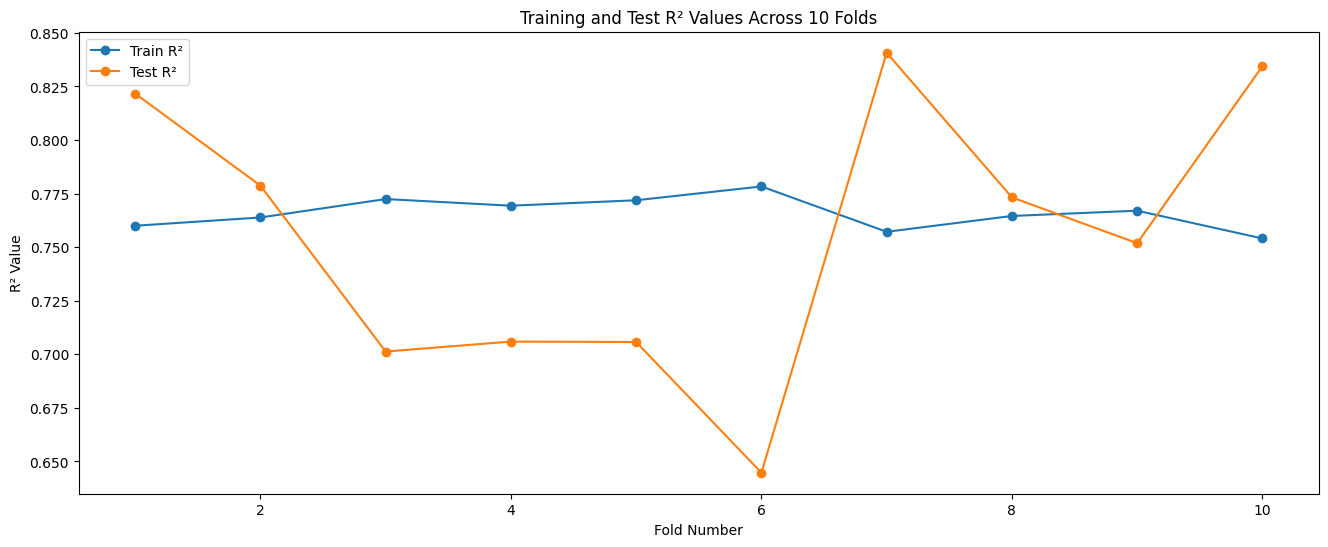

In [ ]:
import matplotlib.pyplot as plt

# Create an array of fold numbers
folds = range(1, len(scores['train_r2']) + 1)

plt.figure(figsize=(16,6))
plt.plot(folds, scores['train_r2'], marker='o', label='Train R²')
plt.plot(folds, scores['test_r2'], marker='o', label='Test R²')
plt.xlabel('Fold Number')
plt.ylabel('R² Value')
plt.title('Training and Test R² Values Across 10 Folds')
plt.legend()
plt.show()

<font color='red'> **Answer:**</font>

**1.3.2  Please apply L1 (Lasso) regularization with variable alpha parameters and report the corresponding alpha value and R<sup>2</sup> value. Use the training split from ```1.1.4``` (1.5 point)**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.linear_model import Lasso, Ridge


cross_val_scores_lasso = []

# List to maintain the different values of alpha
alpha_values = []

# Set up 10-fold cross-validation with random_state=1 and shuffle=True
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Loop over different alpha values (from 0.0001 to 0.0008)
for i in range(1, 9):
    current_alpha = i * 0.0001
    # Formulate the Lasso model with the current alpha value
    model = Lasso(alpha=current_alpha, random_state=0)

    # Evaluate the model using 10-fold cross-validation with R^2 as the scoring metric
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')

    # Calculate the average cross-validated R^2 (multiply by 100 to express as percentage if desired)
    avg_cross_val_score = mean(scores) * 100

    cross_val_scores_lasso.append(avg_cross_val_score)
    alpha_values.append(current_alpha)

# Print the different alpha values and their corresponding cross-validated R^2 scores
for i in range(len(alpha_values)):
    print(str(alpha_values[i]) + ' : ' + str(cross_val_scores_lasso[i]))



0.0001 : 75.58620053023328
0.0002 : 75.58656478837439
0.00030000000000000003 : 75.58689739570701
0.0004 : 75.58719898246807
0.0005 : 75.58745609339168
0.0006000000000000001 : 75.58770774904848
0.0007 : 75.58791545932534
0.0008 : 75.58809167314551


<font color='red'> **Answer:**</font>
0.0001 : 75.58620053023328
0.0002 : 75.58656478837439
0.00030000000000000003 : 75.58689739570701
0.0004 : 75.58719898246807
0.0005 : 75.58745609339168
0.0006000000000000001 : 75.58770774904848
0.0007 : 75.58791545932534
0.0008 : 75.58809167314551

**1.3.3. Take the best alpha value from ```1.3.2``` and use it to train a new lasso model and report the  R<sup>2</sup> value on test set. Use the train test split from ```1.1.4```. (0.5 point)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# Building and fitting the Lasso Regression Model using the best alpha value (0.0008)
lassoModelBest = Lasso(alpha=0.0008, random_state=0)
lassoModelBest.fit(X_train, y_train)

# Evaluating the Lasso Regression model on the test set
print(lassoModelBest.score(X_test, y_test))


0.8213663586019545


<font color='red'> **Answer:**</font>
0.8213663586019545

**1.3.4.  Please apply L2 (Ridge) regularization with variable alpha parameters and report the corresponding alpha value and R<sup>2</sup> value. Use the training split from ```1.1.4``` (1.5 point)**

N.B. The $alpha$ here in the ridge regularization is the same as $lambda$ you saw in the lecture. We did not initiate the variable with $lambda$ because $lambda$ is a reserved keyword in python which is used to create small anonymous functions. A $lambda$ function can take any number of arguments, but can only have one expression.
You can read more about it here: https://www.w3schools.com/python/ref_keyword_lambda.asp#:~:text=The%20lambda%20keyword%20is%20used,and%20the%20result%20is%20returned.

In [ ]:
cross_val_scores_ridge = []
alpha_values = []  # List to maintain the different values of alpha

# Set up 10-fold cross-validation with shuffle=True and random_state=1
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# Loop for different alpha values (from 0.0001 to 0.0008)
for i in range(1, 9):
    current_alpha = i * 0.0001
    # Formulate the Ridge model with the current alpha value (L2 regularization)
    model = Ridge(alpha=current_alpha, random_state=0)

    # Perform 10-fold cross-validation using R² as the scoring metric
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    avg_cross_val_score = mean(scores) * 100  # Multiply by 100 for percentage representation

    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha_values.append(current_alpha)

# Loop to print the different values of alpha and their corresponding cross-validated R² scores
for i in range(len(alpha_values)):
    print(str(alpha_values[i]) + ' : ' + str(cross_val_scores_ridge[i]))

0.0001 : 75.58580530976823
0.0002 : 75.58580540734596
0.00030000000000000003 : 75.58580550492316
0.0004 : 75.58580560249979
0.0005 : 75.58580570007587
0.0006000000000000001 : 75.58580579765139
0.0007 : 75.58580589522636
0.0008 : 75.58580599280074


<font color='red'> **Answer:**</font>

**1.3.5. Take the best alpha value from ```1.3.4``` and use it to train a new ridge model and report the  R<sup>2</sup> value on test set. Use the train test split from ```1.1.4```. (0.5 point)**

In [ ]:
best_alpha = 0.0008

# Building and fitting the Ridge Regression model using the best alpha value
ridgeModelBest = Ridge(alpha=best_alpha, random_state=0)
ridgeModelBest.fit(X_train, y_train)

# Evaluating the Ridge Regression model on the test set
test_r2 = ridgeModelBest.score(X_test, y_test)
print("Test R²:", test_r2)

Test R²: 0.821383051101903


<font color='red'> **Answer:**</font>

## How long did it take you to solve the homework?

* Please answer as precisely as you can. It does not affect your points or grade in any way. It is okay, if it took 0.5 hours or 24 hours. The collected information will be used to improve future homeworks.


<font color='red'> **Answer:**</font>

## What is the level of difficulty for this homework?
you can put only number between $0:10$ ($0:$ easy, $10:$ difficult)

<font color='red'> **Answer:**</font> 9

## Any other comments regarding this homework?

<font color='red'> **Answer:**</font>
I took help of gpt in this homework cause it was difficult for me so am citing the usage of AI.